# **SPEED DATING**

- Connaître la distribution des participants et leur profil

## **Import Libraries**

In [102]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

## **Import dataset**

In [103]:
pd.set_option('display.max_row', 195) # to see all rows
pd.set_option('display.max_column', 195) # to see all columns

In [104]:
df = pd.read_csv('Speed_Dating_Data.csv', encoding = 'unicode_escape', engine = 'python')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [105]:
# Row and column number
print('Data shape :')
print(' - Number of rows :', df.shape[0])
print(' - Number of columns :', df.shape[1])
print()

print('Data types :')
display(df.dtypes.value_counts())
print()

# Basics statistics
print('Basic statistics :')
display(df.describe(include = 'all'))
print()

# Print out all columns
print('All columns :')
print(df.columns.values)

Data shape :
 - Number of rows : 8378
 - Number of columns : 195

Data types :


float64    174
int64       13
object       8
dtype: int64


Basic statistics :


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


All columns :
['iid' 'id' 'gender' 'idg' 'condtn' 'wave' 'round' 'position' 'positin1'
 'order' 'partner' 'pid' 'match' 'int_corr' 'samerace' 'age_o' 'race_o'
 'pf_o_att' 'pf_o_sin' 'pf_o_int' 'pf_o_fun' 'pf_o_amb' 'pf_o_sha' 'dec_o'
 'attr_o' 'sinc_o' 'intel_o' 'fun_o' 'amb_o' 'shar_o' 'like_o' 'prob_o'
 'met_o' 'age' 'field' 'field_cd' 'undergra' 'mn_sat' 'tuition' 'race'
 'imprace' 'imprelig' 'from' 'zipcode' 'income' 'goal' 'date' 'go_out'
 'career' 'career_c' 'sports' 'tvsports' 'exercise' 'dining' 'museums'
 'art' 'hiking' 'gaming' 'clubbing' 'reading' 'tv' 'theater' 'movies'
 'concerts' 'music' 'shopping' 'yoga' 'exphappy' 'expnum' 'attr1_1'
 'sinc1_1' 'intel1_1' 'fun1_1' 'amb1_1' 'shar1_1' 'attr4_1' 'sinc4_1'
 'intel4_1' 'fun4_1' 'amb4_1' 'shar4_1' 'attr2_1' 'sinc2_1' 'intel2_1'
 'fun2_1' 'amb2_1' 'shar2_1' 'attr3_1' 'sinc3_1' 'fun3_1' 'intel3_1'
 'amb3_1' 'attr5_1' 'sinc5_1' 'intel5_1' 'fun5_1' 'amb5_1' 'dec' 'attr'
 'sinc' 'intel' 'fun' 'amb' 'shar' 'like' 'prob' 'met' 'matc

## **Missing values analysis : first approach**

In [106]:
# Percentage of missing values for each column 
print('Percentage of missing values :')
(df.isna().sum()/len(df)).sort_values(ascending=False)[:10]

Percentage of missing values :


num_in_3    0.920267
numdat_3    0.821437
expnum      0.785152
sinc7_2     0.766651
amb7_2      0.766651
shar7_2     0.764383
attr7_2     0.763189
intel7_2    0.763189
fun7_2      0.763189
amb5_3      0.759370
dtype: float64

- We know the speed dating was set up in 3 sessions, the columns on the right seem to have a lot a missing values which may be cause by less people registered this last session

______________

## **Building dataframe before EDA and Satisfaction analysis**

In this part, we will take a look at :

- Women and men distribution based on their age 
- Field of study distribution
- Ethnic groups distribution
- Level of satisfaction 

In [107]:
# Drop duplicates only on iid column
df_1 = df.drop_duplicates(subset= ['iid']).reset_index()
df_1.head()

,index,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,...,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,...,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,10,2,2.0,0,3,1,1,10,3,NaN,10,1,11.0,0,0.29,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,2.0,2.0,24.0,law,1.0,NaN,NaN,NaN,2.0,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,...,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.92,18.92,21.62,27.03,5.41,8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
2,20,3,3.0,0,5,1,1,10,9,NaN,6,1,11.0,0,-0.24,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,7.0,8.0,6.0,5.0,8.0,4.0,5.0,2.0,1.0,25.0,Economics,2.0,NaN,NaN,NaN,2.0,8.0,4.0,Connecticut,"6,268",NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,...,7.0,9.0,10.0,7.0,8.0,9.0,8.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30,4,4.0,0,7,1,1,10,6,NaN,3,1,11.0,0,-0.18,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,7.0,8.0,7.0,7.0,5.0,6.0,3.0,2.0,23.0,Law,1

In [108]:
# Select column for EDA
df_1 = df_1[
        ['iid',
        'age',
        'gender',
        'field_cd',
        'race',
        'goal',
        'match',
        'satis_2',
        'length',
        'numdat_2']
]

In [109]:
# Rename columns
df_1 = df_1.rename(
    columns={
        'field_cd': 'field_of_study',
        'race':'ethnic_group',
        'length': 'date_duration',
        'numdat_2':'nb_of_date'
    }
)

In [110]:
# Data shape
print('Data shape :')
print(' - Number of rows :', df_1.shape[0])
print(' - Number of columns :', df_1.shape[1])
print()

# Basics statistics
print('Basic statistics :')
display(df_1.describe(include = 'all'))
print()

# Data
print('Data :')
df_1.head()

Data shape :
 - Number of rows : 551
 - Number of columns : 10

Basic statistics :


,iid,age,gender,field_of_study,ethnic_group,goal,match,satis_2,date_duration,nb_of_date
count,551.000000,543.000000,551.000000,544.000000,545.000000,544.000000,551.000000,485.000000,485.000000,482.000000
mean,276.787659,26.359116,0.502722,7.549632,2.800000,2.148897,0.150635,5.676289,1.861856,2.311203
std,159.494486,3.766960,0.500447,3.772699,1.253818,1.448273,0.358018,1.804595,0.976738,0.690475
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,139.500000,24.000000,0.000000,5.000000,2.000000,1.000000,0.000000,5.000000,1.000000,2.000000
50%,277.000000,26.000000,1.000000,8.000000,2.000000,2.000000,0.000000,6.000000,1.000000,2.000000
75%,414.500000,28.000000,1.000000,10.000000,4.000000,2.000000,0.000000,7.000000,3.000000,3.000000
max,552.000000,55.000000,1.000000,18.000000,6.000000,6.000000,1.000000,10.000000,3.000000,3.000000


,iid,age,gender,field_of_study,ethnic_group,goal,match,satis_2,date_duration,nb_of_date
0,1,21.0,0,1.0,4.0,2.0,0,6.0,2.0,1.0
1,2,24.0,0,1.0,2.0,1.0,0,5.0,2.0,NaN
2,3,25.0,0,2.0,2.0,6.0,0,NaN,NaN,NaN
3,4,23.0,0,1.0,2.0,1.0,0,4.0,3.0,2.0
4,5,21.0,0,1.0,2.0,2.0,0,7.0,2.0,2.0


____________

## **Missing values**

In [111]:
# Missing values on new dataframe

data = {
    'nan_count' : df_1.isna().sum().sort_values(ascending=False),
    'nan_perc' : (round(df_1.isna().sum().sort_values(ascending=False)/len(df_1), 2)*100)
}

df_1_nan = pd.DataFrame(data)
df_1_nan

,nan_count,nan_perc
nb_of_date,69,13.0
satis_2,66,12.0
date_duration,66,12.0
age,8,1.0
field_of_study,7,1.0
goal,7,1.0
ethnic_group,6,1.0
iid,0,0.0
gender,0,0.0
match,0,0.0


- **``iid`` : no missig values, good news !**

- **``satis_2`` : Total of 66 / 13% people haven't send back the satisfaction to get their match result :**

It is hard to construe anything from that because we know that they were present, **if we check the ``iid``, there is no missing values which means all dates have been set up.** So, were they unsatisfied ? Or not interested ? They might have forgotten to send it back aswell... Some people who haven't send it back have actually matched with someone else (We'll figure it out later) !

We could easily find information after filtering our data.

So we decide to keep those NaN values and replace them by ``'Unknown'`` : the number of people not sending back the satisfaction questions is some important information !

- **``age`` : 8 people haven't mentionned their age**

Missing age values  will be replaced by ``median``.

- **``ethnic_group``, field_of_study, speed_date_nb, length, satis_2**

We will replace other missing categorical values by ``'Unknown'``.

In [112]:
# Replace age nan values by age median
df_1['age'].fillna((df_1['age'].median()), inplace=True)

## **Numerical to categorical + dealing with the last missing values**

In [113]:
# Replace numerical values by categorical values
df_1['gender'] = df_1['gender'].apply(
    lambda x: 'Male' if x == 1 
    else 'Female'
)

In [114]:
# Replace numerical values by categorical values
df_1['match'] = df_1['match'].apply(
    lambda x: 'Yes' if x == 1
    else 'No'
)

In [115]:
# Replace numerical values by categorical values
df_1['ethnic_group'] = df_1['ethnic_group'].apply(
    lambda x: 'African American' if x == 1
    else 'Caucasian' if x == 2
    else 'Hispanic' if x == 3
    else 'Asian' if x == 4
    else 'Native American' if x == 5
    else 'Other' # replacing nan values
)

In [116]:
# Replace numerical values by categorical values
df_1['field_of_study'] = df_1['field_of_study'].apply(
    lambda x: 'Law' if x == 1
    else 'Math' if x == 2
    else 'Social Science, Psychologist' if x == 3
    else 'Medical Science, Pharmaceuticals and Bio Tech' if x== 4
    else 'Engineering' if x == 5
    else 'English / Creative Writing / Journalisim' if x == 6
    else 'History / Religion / Philosophy' if x == 7
    else 'Business / Econ / Finance' if x == 8
    else 'Education, Academia' if x == 9
    else 'Biological Sciences / Chemistry/ Physics' if x == 10
    else 'Social Work' if x == 11
    else 'Undergrad / undecided' if x == 12
    else 'Political Science / International Affairs' if x == 13
    else 'Film' if x == 14
    else 'Fine Arts / Arts Administration' if x == 15
    else 'Languages' if x == 16
    else 'Architechture' if x == 17
    else 'Other' # replacing nan values
)

In [117]:
# Replace numerical values by categorical values
df_1['goal'] = df_1['goal'].apply(
    lambda x: 'For fun' if x == 1
    else 'Meet new people' if x == 2
    else 'Get a date' if x == 3
    else 'Serious relationship' if x == 4
    else 'To say I did it' if x == 5
    else 'Other' # replacing nan values
)

In [118]:
df_1['satis_2'] = df_1['satis_2'].apply(
    lambda x: 'Very satisfied' if x >= 8
    else 'Satisfied' if (x >= 6) and (x < 8)
    else 'Neutral' if x == 5
    else 'Not satisfied' if (x >= 3) and (x < 5) 
    else 'Not satisfied at all' if (x >= 1) and (x < 3)
    else 'Unknown' # replacing nan values
) 

In [119]:
df_1['date_duration'] = df_1['date_duration'].apply(
    lambda x: 'Too little' if x == 1
    else 'Too much' if x == 2
    else 'Just right' if x == 3
    else 'Unknown' # replacing nan values
)

In [120]:
df_1['nb_of_date'] = df_1['nb_of_date'].apply(
    lambda x: 'Too few' if x == 1
    else 'Too many' if x == 2
    else 'Just right' if x == 3
    else 'Unknown' # replacing nan values
)

____________

# **Exploratory Data Analysis**

Age stats :


count    551.000000
mean      26.353902
std        3.739711
min       18.000000
25%       24.000000
50%       26.000000
75%       28.000000
max       55.000000
Name: age, dtype: float64


Gender stats: 


count      551
unique       2
top       Male
freq       277
Name: gender, dtype: object

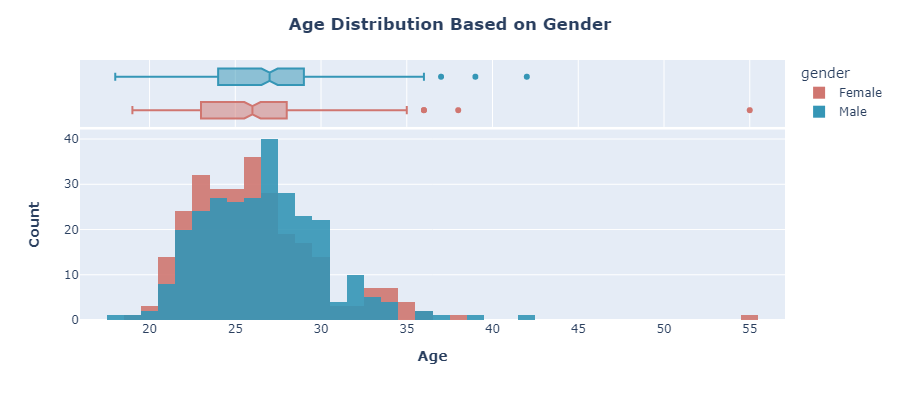

In [121]:
# Distribution of people age based on gender

# histogram
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

fig = px.histogram(
    df_1, x="age", color="gender",
    marginal="box",
    hover_data=df_1.columns,
    barmode='overlay',
    color_discrete_sequence=['#d07670', '#3596b6'],
    opacity=.9,
    height=400,
    width=900
)

# Titles, axes
fig.update_layout(
    #template='plotly_dark',
    title_text='<b>Age Distribution Based on Gender</b>',
    title_x=0.5,
    yaxis_title='<b>Count</b>',
    xaxis_title='<b>Age</b>',
    
)

print('Age stats :')
display(df_1.age.describe())
print()

print('Gender stats: ')
display(df_1.gender.describe())


fig.show("png")

- Most of the people in the dataset are between 20 and 30 year
- There would be as many men as women
- Women trend to be younger than men

**We know that people who participated in speed dating event were student from high education studies so we're not suprised about the age distribution.**

**We can't tell if there is any difference in age between men and women for now.**

**There is no significant age difference between men and women although women are younger on average**

## **Parity**

In [122]:
# This will return a dataframe with value counts and percentage from a column
def get_proportion(data, col_name):
    
    count = data[col_name].value_counts() 
    percentage =  round((data[col_name].value_counts(normalize=True)*100), 2)
    index = data[col_name].value_counts().index
    
    dic = {
        'count' : count,
        'percentage' : percentage
    }
    
    DataFrame = pd.DataFrame(dic,
                            index = index)
    
    return DataFrame.sort_values(by = 'percentage', ascending=True)

In [123]:
get_proportion(df_1, 'gender')

,count,percentage
Female,274,49.73
Male,277,50.27


**Men and women number is almost identical : the speed dating documentation imply that people are dating partner of the opposite sex...**

In [124]:
# Replace numerical values by categorical values on original data (we did it later on our smaller data)
df['gender'] = df['gender'].apply(
    lambda x: 'Male' if x == 1 
    else 'Female'
)

In [125]:
# Filter data to separate men and women
df_female = df[df['gender'] == 'Female']
df_male = df[df['gender'] == 'Male']

In [126]:
# Checking if there were dates with parter of the same sex
print('Checking if there were dates with parter of the same sex...')
print()
print('Among women :', df_female['pid'].isin(df_female['iid']).any())
print()

# Checking if there were dates with parter of the same sex
print('Among men :', df_male['pid'].isin(df_male['iid']).any())

Checking if there were dates with parter of the same sex...

Among women : False

Among men : False


**We can confirm that people only dated partner of the opposite sex**

__________

## Missing dates

In [ ]:
print(df.pid.isna().sum(), 'missing parter id')
print()

print(df_female.pid.isna().sum(),'missing parter id on female data')
print()

print(df_male.pid.isna().sum(),'missing parter id on male data')

In [95]:
#male_nan_values.style.set_caption('Information on satisfaction about men who missed a date')

,iid,gender,pid,partner,wave,round,satis_2,length,numdat_2


____________

## **Field of study**

In [127]:
# Function that will return percentage and count
def groupby(data, col_1, col_2):
    groupby = pd.DataFrame(data.groupby([col_1, col_2]).agg({col_2 : "count"})).groupby(level=0).apply(lambda x: round(100*x/x.sum(),2))
    
    groupby = groupby.rename(columns={col_2: 'percentage'}).reset_index()
    
    groupby['count'] = data.groupby([col_1, col_2])[col_2].agg(['count']).values
    
    return groupby

In [128]:
# Return percentage and count of field of study based on gender
field_study = groupby(df_1, 'gender', 'field_of_study')
field_study.head()

,gender,field_of_study,percentage,count
0,Female,Biological Sciences / Chemistry/ Physics,11.31,31
1,Female,Business / Econ / Finance,10.95,30
2,Female,"Education, Academia",12.77,35
3,Female,Engineering,4.74,13
4,Female,English / Creative Writing / Journalisim,5.84,16


In [129]:
# Function that will return a bar chart
def proportion_plot(data, y, height, width, title):
    
    fig = px.bar(
        data,
        x='count',
        y=y,
        color='gender',
        height=height, 
        width=width,
        text='percentage',
        color_discrete_sequence=['#3596b6', '#d07670']
    )

    fig.update_layout(
        #template='plotly_dark',
        title_text=f'<b>{title}</b>',
        title_x=0.5,
        yaxis_title=None,
        xaxis_title='<b>Count</b>'
    )

    fig.update_traces(texttemplate='%{text} %')

    return fig.show("png")

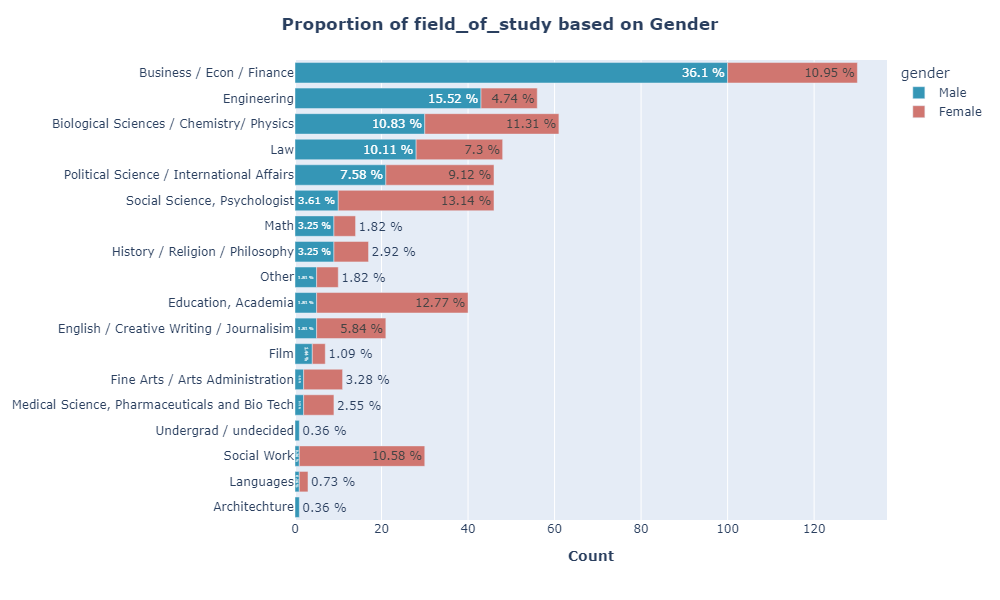

In [130]:
proportion_plot(
    data=field_study.sort_values(by='count', ascending=True),
    y='field_of_study',
    height=600,
    width=1000,
    title='Proportion of field_of_study based on Gender'
)

## **Ethnic groups**

In [131]:
df_ethnic = groupby(df_1, 'gender', 'ethnic_group')
df_ethnic.head()

,gender,ethnic_group,percentage,count
0,Female,African American,5.84,16
1,Female,Asian,25.91,71
2,Female,Caucasian,51.82,142
3,Female,Hispanic,9.12,25
4,Female,Other,7.30,20


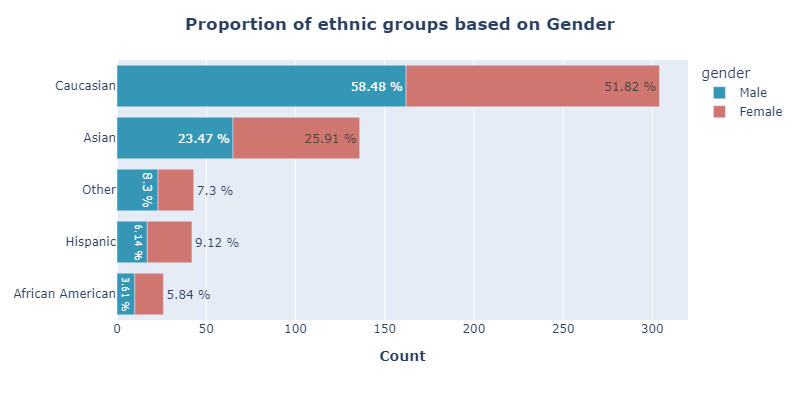

In [157]:
# Plot proportion of ethnic groups among men and women

title = 'Proportion of ethnic groups based on Gender'

proportion_plot(
    data=df_ethnic.sort_values(by='count', ascending=True),
    y='ethnic_group',
    height=400,
    width=800,
    title=title
)

_____________

## **Satisfaction**

In [133]:
# Function that will return a dataframe with count, proportion and index to sort categorical values
def satis_level(data, col_1, col_2):
    
    # Using groupby function we created before for count and proportion
    groupby_data = groupby(data, col_1, col_2)

    index = []
    # Get a list of number to sort the following cat values
    for i in range(len(groupby_data)):
        if groupby_data[col_2][i] == 'Very satisfied':
            index.append(1)
        elif groupby_data[col_2][i] == 'Satisfied':
            index.append(2)
        elif groupby_data[col_2][i] == 'Neutral':
            index.append(3)
        elif groupby_data[col_2][i] == 'Not satisfied':
            index.append(4)
        elif groupby_data[col_2][i] == 'Not satisfied at all':
            index.append(5)
        else:
            index.append(6)
    
    groupby_data['index'] = index 
    print('-> Added satisfaction index')
    print('-> Sorted by index')
    return groupby_data.sort_values(by='index')


In [134]:
# Function that will return a horizontal bar chart with sorted cat values

def bar_plot(data, x, y, color, height, width, colors, title):
    
    fig = px.bar(
        # Data
        data[::-1],
        hover_data=data,
        hover_name='count',
        x=x,
        y=y,

        #Legend & annotate
        color=color,
        text=x,

        # Size
        width=width,
        height=height,

        # Colors
        color_discrete_sequence=colors,
        
        # Cross shape
        pattern_shape=color,
        pattern_shape_sequence=[
                                "x",
                                "",
                                "",
                                "",
                                "",
                                ""]
    )

    # Titles, axes
    fig.update_layout(
        #template='plotly_dark',
        title_text=f'<b>{title}</b>',
        title_x=0.5,
        legend_traceorder="reversed",
        yaxis_title=None,
        xaxis_title=f'<b>{x}</b>'
    )

    # Annotate percentage
    fig.update_traces(
        texttemplate='<b>%{text} %</b>',
        textposition='inside', 
        textfont_size=10,
        insidetextanchor="middle"
    )

    return fig.show("png")

In [135]:
# Apply function to get count, percentage and sorted index
gender_satis = satis_level(df_1, 'gender', 'satis_2')
gender_satis.head()

-> Added satisfaction index
-> Sorted by index


,gender,satis_2,percentage,count,index
5,Female,Very satisfied,8.03,22,1
11,Male,Very satisfied,17.69,49,1
3,Female,Satisfied,36.13,99,2
9,Male,Satisfied,41.88,116,2
0,Female,Neutral,17.15,47,3


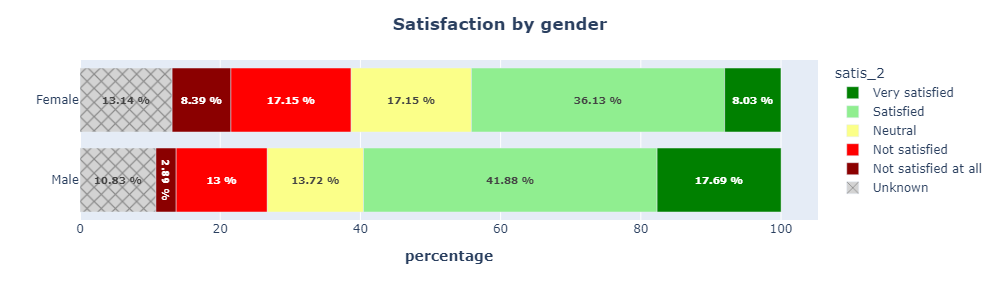

In [136]:
# Apply plot function
colors = ['lightgrey', 'darkred', 'red', '#fbff89', 'lightgreen', 'green']
title = 'Satisfaction by gender'

fig = bar_plot(data=gender_satis,
         x='percentage',
         y='gender',
         color='satis_2',
         height=300,
         width=1000,
         colors=colors,
        title=title)

In [137]:
# Apply function to get count, percentage and sorted index
study_satis = satis_level(df_1, 'field_of_study', 'satis_2')
study_satis.head()

-> Added satisfaction index
-> Sorted by index


,field_of_study,satis_2,percentage,count,index
12,Business / Econ / Finance,Very satisfied,10.00,13,1
33,Film,Very satisfied,14.29,1,1
18,"Education, Academia",Very satisfied,17.50,7,1
84,Social Work,Very satisfied,16.67,5,1
43,History / Religion / Philosophy,Very satisfied,5.88,1,1


In [138]:
# Get rid of field of study where count < 10

# Apply function to get count and percentage
study_proportion = get_proportion(df_1, 'field_of_study').sort_values(by='percentage', ascending=False)

# Get names of field of study to keep
names = study_proportion.index[:5].tolist()

# Filter data to get only rows that contain names on the list
mask = study_satis[study_satis['field_of_study'].str.contains('|'.join(names))]

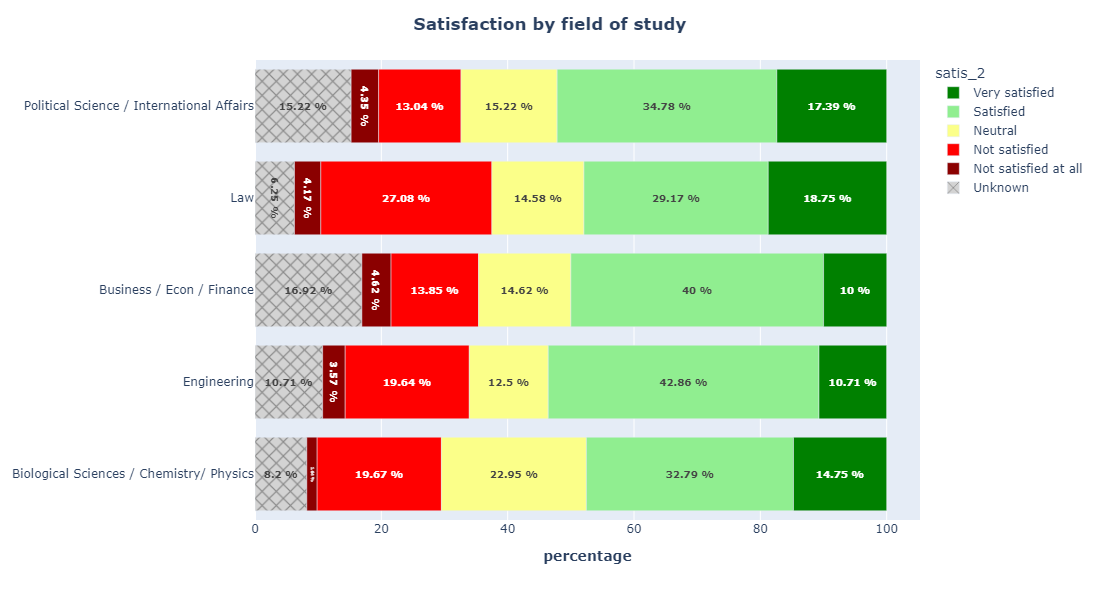

In [139]:
# Apply plot function
colors = ['lightgrey', 'darkred', 'red', '#fbff89', 'lightgreen', 'green']
title  = 'Satisfaction from top 5 field of study'

fig = bar_plot(
    data=mask, # Data is filtered
    x='percentage',
    y='field_of_study',
    color='satis_2',
    height=600,
    width=1100,
    colors=colors,
    title=title
)

fig

In [140]:
print('Overall satisfaction rate :', round(df.satis_2.mean(), 2),'/ 10')
print('(''Uknown values have not been taken into consideration)')

Overall satisfaction rate : 5.71 / 10
(Uknown values have not been taken into consideration)


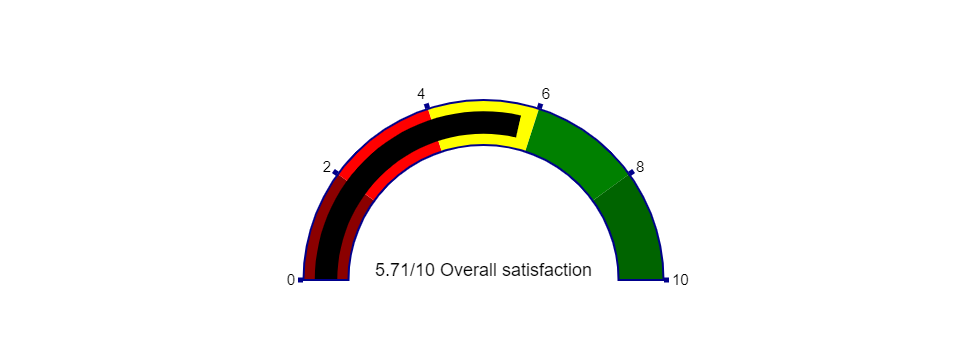

In [141]:
import plotly.graph_objects as go
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    number = {'suffix': "/10 Overall satisfaction", 'font': {'size': 18}},
    value = df.satis_2.mean(),
    gauge = {
        'axis': {'range': [None, 10], 'tickwidth': 5, 'tickcolor': "darkblue"},
        'bar': {'color': "black"},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "darkblue",
        'steps': [
            {'range': [0, 2], 'color': 'darkred'},
            {'range': [2, 4], 'color': 'red'},
            {'range': [4, 6], 'color': 'yellow'},
            {'range': [6, 8], 'color': 'green'},
            {'range': [8, 10], 'color': 'darkgreen'}],
        }))

#fig.update_layout(template='plotly_dark')


fig.update_layout(font = {'color': "black", 'family': "Arial", "size":15})

fig.show("png")

In [142]:
def len_satis_level(data, col_1, col_2):
   
    groupby_data = groupby(data, col_1, col_2)

    index = []
    
    for i in range(len(groupby_data)):
        if groupby_data[col_2][i] == 'Just right':
            index.append(1)
        elif groupby_data[col_2][i] == 'Too little':
            index.append(2)
        elif groupby_data[col_2][i] == 'Too much':
            index.append(3)
        else:
            index.append(4)
    
    groupby_data['index'] = index 
    print('-> Added satisfaction index')
    print('-> Sorted by index')
    return groupby_data.sort_values(by='index')


In [143]:
df_unsatisfied = df_1[(df_1['satis_2'] == 'Not satisfied') | (df_1['satis_2'] == 'Not satisfied at all')]
df_unsatisfied.head()

,iid,age,gender,field_of_study,ethnic_group,goal,match,satis_2,date_duration,nb_of_date
3,4,23.0,Female,Law,Caucasian,For fun,No,Not satisfied,Just right,Too many
5,6,23.0,Female,Law,Asian,For fun,No,Not satisfied,Just right,Too many
9,10,26.0,Female,Political Science / International Affairs,Caucasian,Meet new people,No,Not satisfied at all,Too much,Too many
23,24,27.0,Female,Social Work,Caucasian,Meet new people,No,Not satisfied,Just right,Too many
24,25,25.0,Female,Social Work,Caucasian,For fun,No,Not satisfied,Too little,Too many


In [144]:
data = len_satis_level(df_unsatisfied, 'gender', 'date_duration')
data.head()

-> Added satisfaction index
-> Sorted by index


,gender,date_duration,percentage,count,index
0,Female,Just right,54.29,38,1
3,Male,Just right,36.36,16,1
1,Female,Too little,40.00,28,2
4,Male,Too little,63.64,28,2
2,Female,Too much,5.71,4,3


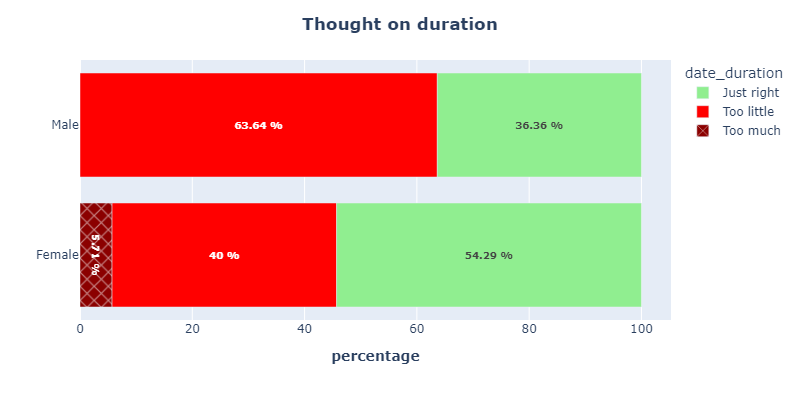

In [145]:
colors= ['darkred', 'red', 'lightgreen']
title = 'Thought on duration'

bar_plot(data=data,
         x='percentage',
         y='gender',
         color='date_duration',
        height=400,
        width=800,
        colors=colors,
        title=title)

In [147]:
def date_nb_satis(data, col_1, col_2):
   
    groupby_data = groupby(data, col_1, col_2)

    index = []
    
    for i in range(len(groupby_data)):
        if groupby_data[col_2][i] == 'Just right':
            index.append(1)
        elif groupby_data[col_2][i] == 'Too few':
            index.append(2)
        elif groupby_data[col_2][i] == 'Too many':
            index.append(3)
        else:
            index.append(4)
    
    groupby_data['index'] = index 
    print('-> Added satisfaction index')
    print('-> Sorted by index')
    return groupby_data.sort_values(by='index')


In [149]:
data = date_nb_satis(df_unsatisfied, 'gender', 'nb_of_date')

-> Added satisfaction index
-> Sorted by index


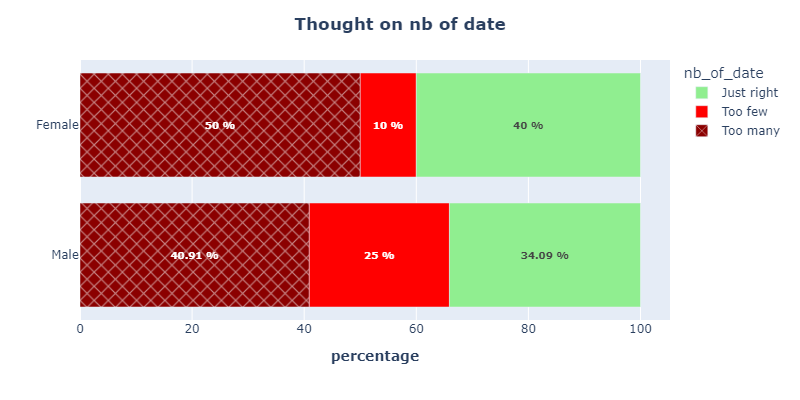

In [150]:
colors= ['darkred', 'red', 'lightgreen']
title = 'Thought on nb of date'

bar_plot(data=data,
         x='percentage',
         y='gender',
         color='nb_of_date',
        height=400,
        width=800,
        colors=colors,
        title=title)

In [152]:
data = len_satis_level(df_1, 'field_of_study', 'date_duration')
data.head()

-> Added satisfaction index
-> Sorted by index


,field_of_study,date_duration,percentage,count,index
26,Languages,Just right,33.33,1,1
48,Social Work,Just right,50.00,15,1
44,"Social Science, Psychologist",Just right,34.78,16,1
40,Political Science / International Affairs,Just right,43.48,20,1
37,Other,Just right,30.00,3,1


In [154]:
# Get rid of field od study where count < 10

# Apply function to get count and percentage
data_filter = get_proportion(df_1, 'field_of_study')

# Get list of field of study names
data_filter = data_filter[data_filter['count'] > 10].index.tolist()

# Filter data to get only rows that contain names on the list
mask = data[data['field_of_study'].str.contains('|'.join(data_filter))]

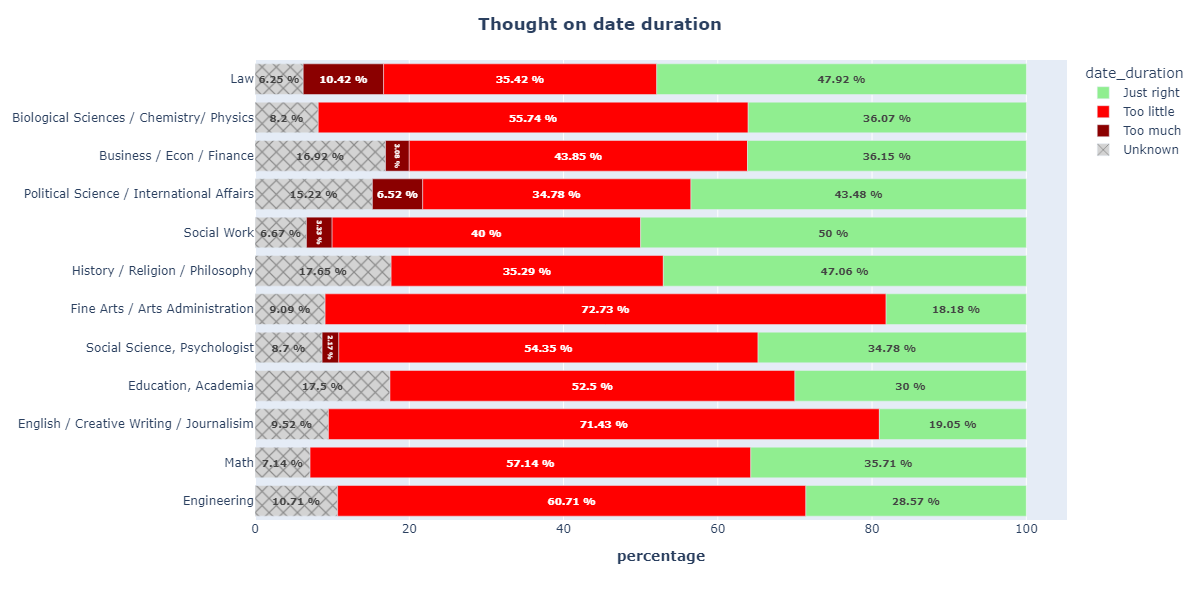

In [155]:
colors= ['lightgrey', 'darkred', 'red', 'lightgreen']
title = 'Thought on date duration'

bar_plot(data=mask,
         x='percentage',
         y='field_of_study',
         color='date_duration',
        height=600,
        width=1200,
        colors=colors,
        title=title)